In [1]:
import pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ratings = pd.read_csv("rtg.csv", encoding='latin-1', sep=';')
books = pd.read_csv("books.csv", encoding='latin-1', sep=';')

C:\Users\user\anakonda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,195153448,Classical Mythology,Mark P. O. Morford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005018,Clara Callan,Richard Bruce Wright,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60973129,Decision in Normandy,Carlo D'Este,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,393045218,The Mummies of Urumchi,E. J. W. Barber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
books = books.drop(['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 
                    'Unnamed: 8', 'Unnamed: 9','Unnamed: 10'], axis =1)

In [6]:
df = pd.merge(ratings, books, on = "ISBN")

In [7]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose


In [8]:
df = df.drop(df[df["Book-Rating"] == 0].index)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351863 entries, 1 to 941130
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      351863 non-null  int64 
 1   ISBN         351863 non-null  object
 2   Book-Rating  351863 non-null  int64 
 3   Book-Title   351863 non-null  object
 4   Book-Author  351862 non-null  object
dtypes: int64(2), object(3)
memory usage: 16.1+ MB


In [10]:
rat = pd.DataFrame(df.groupby("Book-Author")["Book-Rating"].mean())

In [11]:
rat.head()

,Book-Rating
Book-Author,
D. Chiel,10.000000
Mimma Balia,8.000000
"Unfounded Findings\""""",7.000000
"\""Forsaking All Others\""",8.000000
"\""The Homing Pigeons\""""",8.666667


In [12]:
rat["no of ratings"] = pd.DataFrame(df.groupby("Book-Author")["Book-Rating"].count())

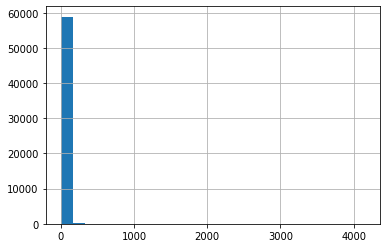

In [13]:
rat["no of ratings"].hist(bins=25)

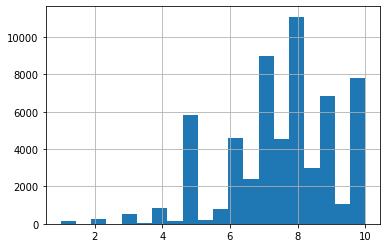

In [14]:
rat["Book-Rating"].hist(bins=20)

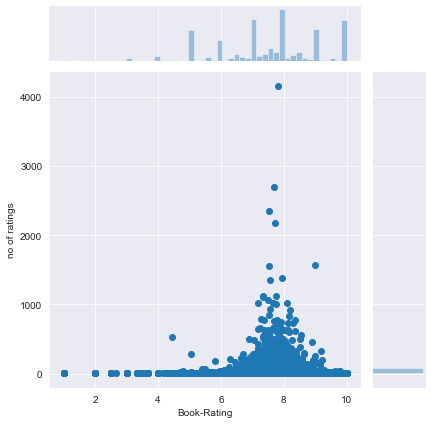

In [15]:
sns.set_style("darkgrid")
sns.jointplot(x="Book-Rating", y= "no of ratings", data = rat)

In [16]:
df.groupby("Book-Author")["Book-Rating"].count().sort_values(ascending=False)

Book-Author
Stephen King         4156
Nora Roberts         2701
John Grisham         2354
James Patterson      2173
J. K. Rowling        1566
                     ... 
Lin Sexton              1
Lim                     1
Lily M. Chin            1
Lilly Paige White       1
 D. Chiel               1
Name: Book-Rating, Length: 59137, dtype: int64

In [17]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose


In [18]:
no_of_rat = df.groupby("Book-Author")["Book-Rating"].count()

In [19]:
no_of_rat.head()

Book-Author
 D. Chiel                    1
 Mimma Balia                 1
 Unfounded Findings\""       1
 \"Forsaking All Others\"    1
 \"The Homing Pigeons\""     3
Name: Book-Rating, dtype: int64

In [20]:
data = pd.merge(df, no_of_rat, on = "Book-Author")

In [21]:
data.head(50)

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Book-Rating_y
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,25
1,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,25
2,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,25
3,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,25
4,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,25
5,77480,034545104X,8,Flesh Tones: A Novel,M. J. Rose,25
6,94362,034545104X,5,Flesh Tones: A Novel,M. J. Rose,25
7,98391,034545104X,9,Flesh Tones: A Novel,M. J. Rose,25
8,112199,034545104X,6,Flesh Tones: A Novel,M. J. Rose,25
9,115435,034545104X,5,Flesh Tones: A Novel,M. J. Rose,25


In [22]:
data.columns = ['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'no_of_ratings']

In [23]:
data.describe()

,User-ID,Book-Rating,no_of_ratings
count,351862.000000,351862.000000,351862.000000
mean,124375.555908,7.627442,274.357288
std,73758.315904,1.839124,607.126767
min,8.000000,1.000000,1.000000
25%,60337.000000,7.000000,6.000000
50%,122044.500000,8.000000,47.000000
75%,187598.000000,9.000000,263.000000
max,278854.000000,10.000000,4156.000000


In [24]:
# smazat autory, jejichž knihy mají méně než 100 hodnocení
data = data.drop(data[data["no_of_ratings"] < 100].index)

In [25]:
mat = data.pivot_table(index="User-ID", columns="Book-Author", values= "Book-Rating")
mat.head()

Book-Author,A. Manette Ansay,ANNA QUINDLEN,ANNE RICE,ANNE TYLER,Adriana Trigiani,Agatha Christie,Al Franken,Alan Dean Foster,Albert Camus,Aldous Huxley,...,Virginia Woolf,W. E. B. Griffin,Wally Lamb,Walter Mosley,Willa Cather,William Gerald Golding,William Gibson,William Shakespeare,Yann Martel,Zora Neale Hurston
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
rat.sort_values("no of ratings", ascending=False).head(50)

,Book-Rating,no of ratings
Book-Author,,
Stephen King,7.807267,4156
Nora Roberts,7.695668,2701
John Grisham,7.526338,2354
James Patterson,7.710078,2173
J. K. Rowling,8.980843,1566
Mary Higgins Clark,7.513462,1560
Janet Evanovich,7.923858,1379
Dean R. Koontz,7.565538,1358
Sue Grafton,7.735816,1128


In [27]:
tolkien_ratings = mat["J. R. R. Tolkien"]

In [28]:
similar_to_tolkien = mat.corrwith(tolkien_ratings)

C:\Users\user\anakonda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\user\anakonda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
corr_tolkien = pd.DataFrame(similar_to_tolkien, columns=["Correlation"])
corr_tolkien.dropna(inplace=True)

In [30]:
corr_tolkien.sort_values("Correlation", ascending=False).head(20)

,Correlation
Book-Author,
Diana Palmer,1.000000
Suzanne Brockmann,1.000000
J. R. R. Tolkien,1.000000
Lori Foster,1.000000
Marcia Muller,1.000000
Stephanie Laurens,1.000000
Bernhard Schlink,1.000000
Julia Quinn,1.000000
Cassie Edwards,1.000000


In [31]:
corr_tolkien = corr_tolkien.join(rat["no of ratings"])

In [32]:
corr_tolkien[corr_tolkien["no of ratings"]>100].sort_values("Correlation", ascending=False).head(50)

,Correlation,no of ratings
Book-Author,,
Diana Palmer,1.000000,297
J. R. R. Tolkien,1.000000,558
Marcia Muller,1.000000,126
Suzanne Brockmann,1.000000,114
Bernhard Schlink,1.000000,248
Lori Foster,1.000000,166
Stephanie Laurens,1.000000,119
Julia Quinn,1.000000,111
Sheri Reynolds,1.000000,101


In [33]:
# jenom uživatelé, kterí vysoce  hodnotili knihy od Tolkiena
mat_910 = mat[mat["J. R. R. Tolkien"]>8]

In [34]:
mat_910 = mat_910.T
mat_910.head()

User-ID,92,643,853,882,2749,5896,11676,11944,12272,13191,...,242640,244171,245294,245333,248122,248718,249220,250764,276847,276861
Book-Author,,,,,,,,,,,,,,,,,,,,,
A. Manette Ansay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANNA QUINDLEN,NaN,NaN,NaN,NaN,NaN,NaN,7.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANNE RICE,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
ANNE TYLER,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adriana Trigiani,NaN,NaN,NaN,NaN,NaN,NaN,6.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# průměrná hodnocení od lidí, co dali Tolkienovi 9 a 10
prum = pd.DataFrame(mat_910.mean(axis=1), columns=["Mean"])
prum

,Mean
Book-Author,
A. Manette Ansay,8.750000
ANNA QUINDLEN,7.809524
ANNE RICE,7.988889
ANNE TYLER,7.700000
Adriana Trigiani,6.388889
...,...
William Gerald Golding,8.750000
William Gibson,8.200000
William Shakespeare,9.105418


In [36]:
# počet hodnocení od lidí, co dali Tolkienovi 9 a 10
poc = pd.DataFrame(mat_910.count(axis=1), columns=["Count"])
poc

,Count
Book-Author,
A. Manette Ansay,2
ANNA QUINDLEN,7
ANNE RICE,15
ANNE TYLER,5
Adriana Trigiani,3
...,...
William Gerald Golding,8
William Gibson,5
William Shakespeare,19


In [37]:
# sloučení do jednoho  dataframu
tolkien_910 = pd.merge(poc, prum, on="Book-Author")
tolkien_910

,Count,Mean
Book-Author,,
A. Manette Ansay,2,8.750000
ANNA QUINDLEN,7,7.809524
ANNE RICE,15,7.988889
ANNE TYLER,5,7.700000
Adriana Trigiani,3,6.388889
...,...,...
William Gerald Golding,8,8.750000
William Gibson,5,8.200000
William Shakespeare,19,9.105418


In [38]:
tolkien_910.dropna()

,Count,Mean
Book-Author,,
A. Manette Ansay,2,8.750000
ANNA QUINDLEN,7,7.809524
ANNE RICE,15,7.988889
ANNE TYLER,5,7.700000
Adriana Trigiani,3,6.388889
...,...,...
William Gerald Golding,8,8.750000
William Gibson,5,8.200000
William Shakespeare,19,9.105418


In [39]:
# nejlépe hodnocení autoři, od těch, co hodnotili Tolkiena na 9 a 10
tolkien_910[tolkien_910["Count"]>9]["Mean"].sort_values(ascending=False).head(25)

Book-Author
J. R. R. Tolkien           9.668929
E. B. White                9.638889
J.R.R. TOLKIEN             9.601852
Bill Watterson             9.484848
Harper Lee                 9.384615
J.R.R. Tolkien             9.379167
Frances Hodgson Burnett    9.330000
J. K. Rowling              9.243309
RAY BRADBURY               9.230769
Bram Stoker                9.200000
James Herriot              9.141667
William Shakespeare        9.105418
Sue Monk Kidd              9.100000
C. S. Lewis                9.009524
Mark Twain                 8.929412
Not Applicable (Na )       8.866667
Neil Gaiman                8.864379
Rebecca Wells              8.863636
Lewis Carroll              8.825000
John Berendt               8.772727
L.M. MONTGOMERY            8.768333
Tim Lahaye                 8.750000
Charlotte Bronte           8.742424
George Orwell              8.677083
Orson Scott Card           8.650490
Name: Mean, dtype: float64

In [40]:
# totožný postup, ale jenom za ty  uživatele, kteří hodnotili knihy od Tolkiena na 10
mat_10 = mat[mat["J. R. R. Tolkien"]==10]

In [41]:
mat_10

Book-Author,A. Manette Ansay,ANNA QUINDLEN,ANNE RICE,ANNE TYLER,Adriana Trigiani,Agatha Christie,Al Franken,Alan Dean Foster,Albert Camus,Aldous Huxley,...,Virginia Woolf,W. E. B. Griffin,Wally Lamb,Walter Mosley,Willa Cather,William Gerald Golding,William Gibson,William Shakespeare,Yann Martel,Zora Neale Hurston
User-ID,,,,,,,,,,,,,,,,,,,,,
882,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN
248122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
mat_10 = mat_10.T
mat_10.head()

User-ID,882,2749,5896,12272,13191,14079,14470,16263,19206,20172,...,225887,226965,232773,234828,237407,242640,248122,249220,250764,276847
Book-Author,,,,,,,,,,,,,,,,,,,,,
A. Manette Ansay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANNA QUINDLEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANNE RICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANNE TYLER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adriana Trigiani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# průměrná hodnocení od lidí, co dali Tolkienovi 10
prum10 = pd.DataFrame(mat_10.mean(axis=1), columns=["Mean"])
prum10

,Mean
Book-Author,
A. Manette Ansay,8.750000
ANNA QUINDLEN,7.833333
ANNE RICE,8.277778
ANNE TYLER,8.333333
Adriana Trigiani,6.250000
...,...
William Gerald Golding,9.000000
William Gibson,8.000000
William Shakespeare,9.491667


In [44]:
# počet hodnocení od lidí, co dali Tolkienovi 10
poc10 = pd.DataFrame(mat_10.count(axis=1), columns=["Count"])
poc10

,Count
Book-Author,
A. Manette Ansay,2
ANNA QUINDLEN,6
ANNE RICE,9
ANNE TYLER,3
Adriana Trigiani,2
...,...
William Gerald Golding,4
William Gibson,1
William Shakespeare,12


In [45]:
# sloučení do jednoho dataframu
tolkien_10 = pd.merge(poc10, prum10, on="Book-Author")
tolkien_10

,Count,Mean
Book-Author,,
A. Manette Ansay,2,8.750000
ANNA QUINDLEN,6,7.833333
ANNE RICE,9,8.277778
ANNE TYLER,3,8.333333
Adriana Trigiani,2,6.250000
...,...,...
William Gerald Golding,4,9.000000
William Gibson,1,8.000000
William Shakespeare,12,9.491667


In [46]:
# průměrné hodnocení těch, co dali Tolkiena na 10, pouze ti, co měli 5 a více hodnocení
tolkien_10[tolkien_10["Count"]>4]["Mean"].sort_values(ascending=False).head(25)

Book-Author
J. R. R. Tolkien               10.000000
J.R.R. TOLKIEN                  9.960000
Bill Watterson                  9.761905
J.R.R. Tolkien                  9.718750
Harper Lee                      9.714286
Bram Stoker                     9.714286
E. B. White                     9.696970
Shel Silverstein                9.611111
MITCH ALBOM                     9.600000
William Shakespeare             9.491667
James Herriot                   9.468750
J. K. Rowling                   9.443631
Robert Fulghum                  9.400000
C. S. Lewis                     9.393557
Frances Hodgson Burnett         9.357143
Mary Wollstonecraft Shelley     9.333333
RAY BRADBURY                    9.285714
Madeleine L'Engle               9.266667
ISAAC ASIMOV                    9.202381
Jean Craighead George           9.200000
Alexander McCall Smith          9.200000
L.M. MONTGOMERY                 9.166667
Oscar Wilde                     9.166667
Isabel Allende                  9.104167
Larr

In [47]:
mat

Book-Author,A. Manette Ansay,ANNA QUINDLEN,ANNE RICE,ANNE TYLER,Adriana Trigiani,Agatha Christie,Al Franken,Alan Dean Foster,Albert Camus,Aldous Huxley,...,Virginia Woolf,W. E. B. Griffin,Wally Lamb,Walter Mosley,Willa Cather,William Gerald Golding,William Gibson,William Shakespeare,Yann Martel,Zora Neale Hurston
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
import numpy as np
from sklearn.model_selection import train_test_split

In [49]:
# tabulka jen za uživatele, kteří hodnotili Tolkiena
mat_tol = mat[mat["J. R. R. Tolkien"]>0]

In [50]:
mat_tol

Book-Author,A. Manette Ansay,ANNA QUINDLEN,ANNE RICE,ANNE TYLER,Adriana Trigiani,Agatha Christie,Al Franken,Alan Dean Foster,Albert Camus,Aldous Huxley,...,Virginia Woolf,W. E. B. Griffin,Wally Lamb,Walter Mosley,Willa Cather,William Gerald Golding,William Gibson,William Shakespeare,Yann Martel,Zora Neale Hurston
User-ID,,,,,,,,,,,,,,,,,,,,,
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
mat_tol["J. R. R. Tolkien"]

User-ID
92         8.333333
254        8.000000
643        9.000000
853        9.000000
882       10.000000
            ...    
249220    10.000000
250764    10.000000
276847    10.000000
276861     9.000000
278246     8.000000
Name: J. R. R. Tolkien, Length: 322, dtype: float64

In [52]:
# nahrazení NaN průměrem za daného autora, jinými slovy - nehodnotili-li, pak budu počítat průměr pro daného autora
mat_tol2 = mat_tol.fillna(mat_tol.mean(),axis = 0)

In [53]:
mat_tol2

Book-Author,A. Manette Ansay,ANNA QUINDLEN,ANNE RICE,ANNE TYLER,Adriana Trigiani,Agatha Christie,Al Franken,Alan Dean Foster,Albert Camus,Aldous Huxley,...,Virginia Woolf,W. E. B. Griffin,Wally Lamb,Walter Mosley,Willa Cather,William Gerald Golding,William Gibson,William Shakespeare,Yann Martel,Zora Neale Hurston
User-ID,,,,,,,,,,,,,,,,,,,,,
92,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
254,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.000000,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
643,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
853,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
882,7.833333,7.766667,7.719697,7.928571,7.041667,10.000000,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249220,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
250764,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5
276847,7.833333,7.766667,7.719697,7.928571,7.041667,7.985266,8.0,6.227273,8.166667,8.333333,...,7.52381,7.865934,7.966667,7.928571,7.25,8.888889,7.222222,8.537729,8.117647,7.5


In [54]:
rat.sort_values("no of ratings", ascending=False).head(10)

,Book-Rating,no of ratings
Book-Author,,
Stephen King,7.807267,4156
Nora Roberts,7.695668,2701
John Grisham,7.526338,2354
James Patterson,7.710078,2173
J. K. Rowling,8.980843,1566
Mary Higgins Clark,7.513462,1560
Janet Evanovich,7.923858,1379
Dean R. Koontz,7.565538,1358
Sue Grafton,7.735816,1128


In [55]:
# nezávislé proměnné - 10 nejhodnocenějších autorů, závislá proměnná - Tolkien
X = mat_tol2[["Stephen King", "Nora Roberts", "John Grisham", "James Patterson", "J. K. Rowling", "Mary Higgins Clark",
             "Janet Evanovich", "Dean R. Koontz", "Sue Grafton", "Anne Rice"]]
y = mat_tol2["J. R. R. Tolkien"]

In [56]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# vytvoření modelu pro linární regresi
lm = LinearRegression()

In [59]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# predikce modelu
predictions = lm.predict(X_test)

In [61]:
# metriky
from sklearn import metrics

In [62]:
metrics.mean_absolute_error(predictions,y_test)

1.3281539416511172

In [63]:
metrics.mean_squared_error(predictions,y_test)

3.2000500951581903

In [64]:
np.sqrt(metrics.mean_squared_error(predictions,y_test))

1.7888683839674149

In [65]:
metrics.r2_score(y_test, predictions)

-0.01254429258209111